 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
whale_returns = pd.read_csv(whale_returns_csv, index_col="Date", parse_dates=True)
whale_returns.head(5)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_returns.isna().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_returns = whale_returns.dropna()
whale_returns.isna().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_returns_csv, index_col="Date", parse_dates=True)
algo_returns.head(5)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_returns.isna().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_returns = algo_returns.dropna()
algo_returns.isna().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
sp500_history = pd.read_csv(sp500_history_csv, index_col="Date", parse_dates=True)
sp500_history.columns = ['Daily Returns']
sp500_history.sort_index(inplace = True)
sp500_history.head(5)

,Daily Returns
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [9]:
# Check Data Types
sp500_history.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1649 entries, 2012-10-01 to 2019-04-23
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Daily Returns  1649 non-null   object
dtypes: object(1)
memory usage: 25.8+ KB


In [10]:
# Fix Data Types
sp500_history['Daily Returns'] = sp500_history['Daily Returns'].str.replace('$','').astype(float)
sp500_history.head(5)

,Daily Returns
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [11]:
sp500_history.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1649 entries, 2012-10-01 to 2019-04-23
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Daily Returns  1649 non-null   float64
dtypes: float64(1)
memory usage: 25.8 KB


In [12]:
# Calculate Daily Returns
sp500_daily_returns = sp500_history['Daily Returns'].pct_change()
sp500_daily_returns.head(5)

Date
2012-10-01         NaN
2012-10-02    0.000872
2012-10-03    0.003624
2012-10-04    0.007174
2012-10-05   -0.000322
Name: Daily Returns, dtype: float64

In [13]:
# Drop nulls
sp500_daily_returns = sp500_daily_returns.dropna()
sp500_daily_returns

Date
2012-10-02    0.000872
2012-10-03    0.003624
2012-10-04    0.007174
2012-10-05   -0.000322
2012-10-08   -0.003457
                ...   
2019-04-16    0.000509
2019-04-17   -0.002274
2019-04-18    0.001579
2019-04-22    0.001012
2019-04-23    0.008841
Name: Daily Returns, Length: 1648, dtype: float64

In [14]:
# Rename Column
sp500_daily_returns.columns = ['Date', 'Daily % Change']

## Combine Whale, Algorithmic, and S&P 500 Returns

In [15]:
# Concatenate all DataFrames into a single DataFrame
complete_port = pd.concat([whale_returns, algo_returns, sp500_daily_returns], axis = 'columns', join = 'inner')
complete_port

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Daily Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

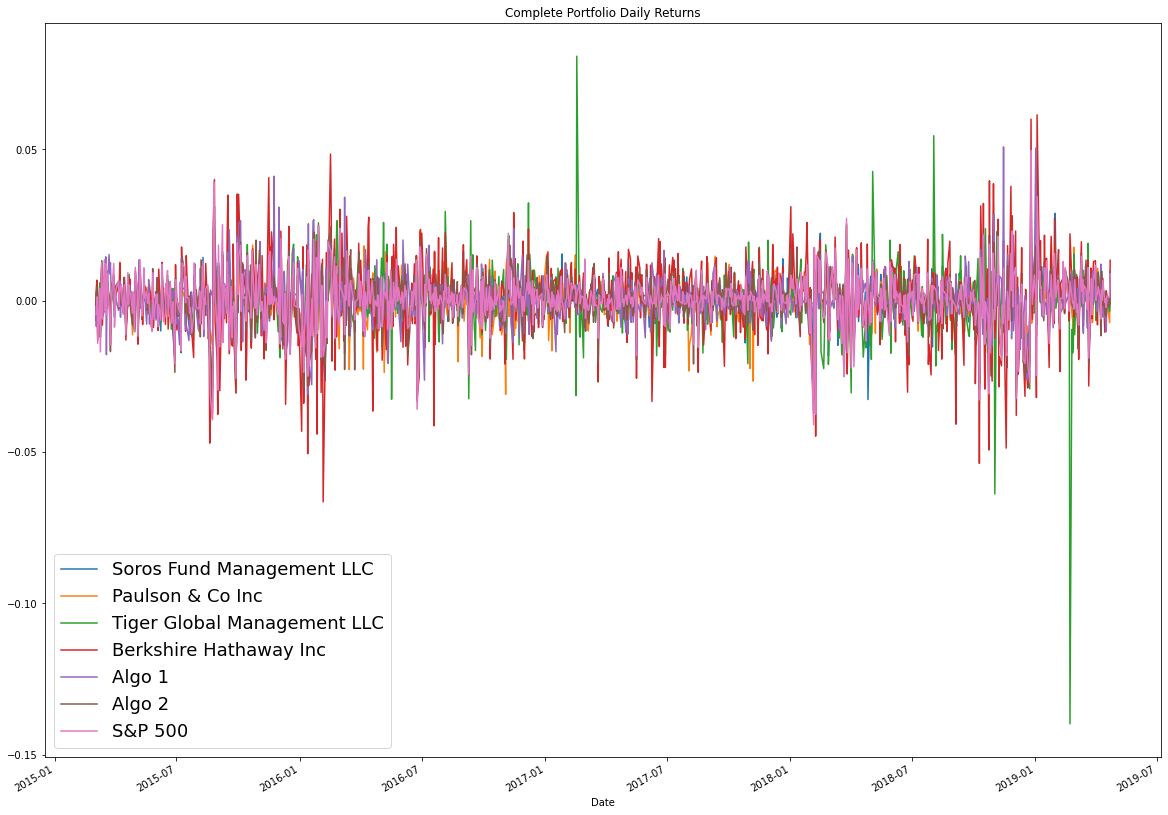

In [16]:
# Plot daily returns
complete_port_plotted = complete_port.plot(title='Complete Portfolio Daily Returns', figsize=(20,15))
complete_port_plotted.legend(['Soros Fund Management LLC', 'Paulson & Co Inc','Tiger Global Management LLC','Berkshire Hathaway Inc', 'Algo 1','Algo 2','S&P 500'], loc='lower left', prop={'size': 18})

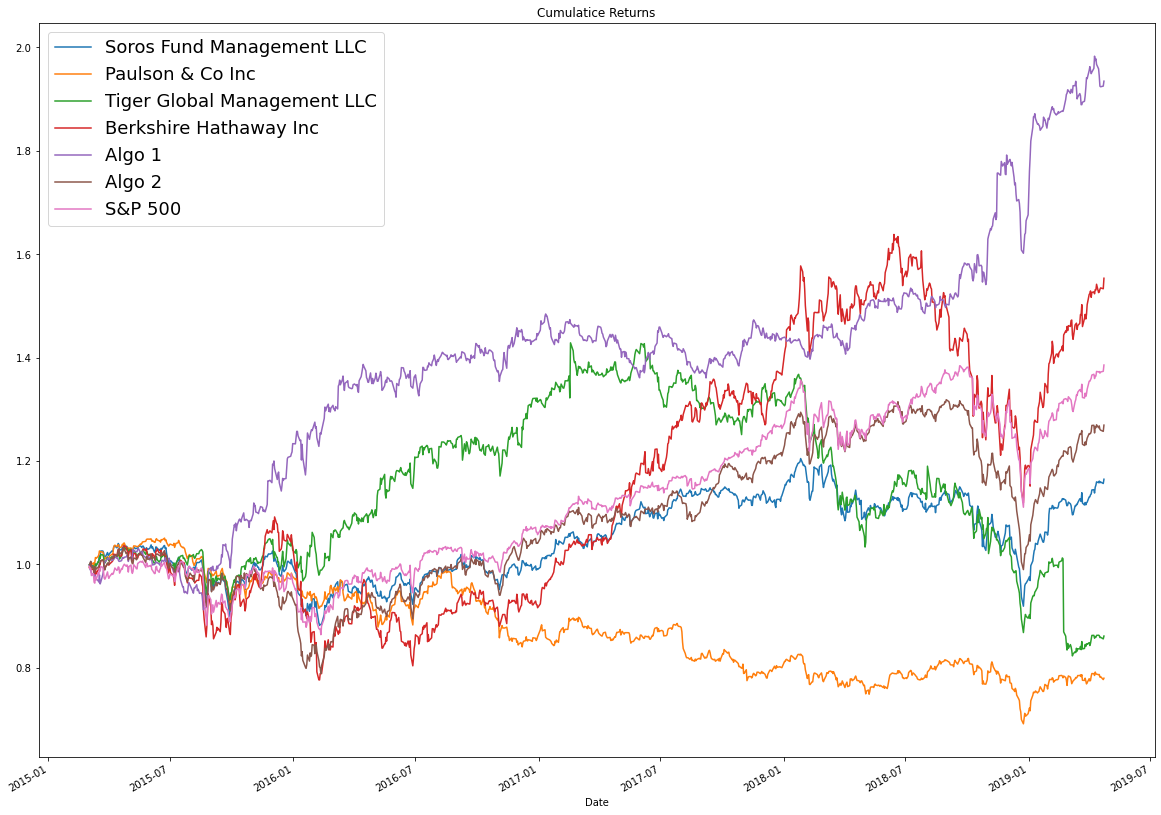

In [17]:
# Plot cumulative returns
cumulative_returns = (complete_port+1).cumprod()
cumulative_returns_plot = cumulative_returns.plot(title= 'Cumulatice Returns', figsize=(20,15))
cumulative_returns_plot.legend(['Soros Fund Management LLC', 'Paulson & Co Inc','Tiger Global Management LLC','Berkshire Hathaway Inc', 'Algo 1','Algo 2','S&P 500'], loc='upper left', prop={'size': 18})

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

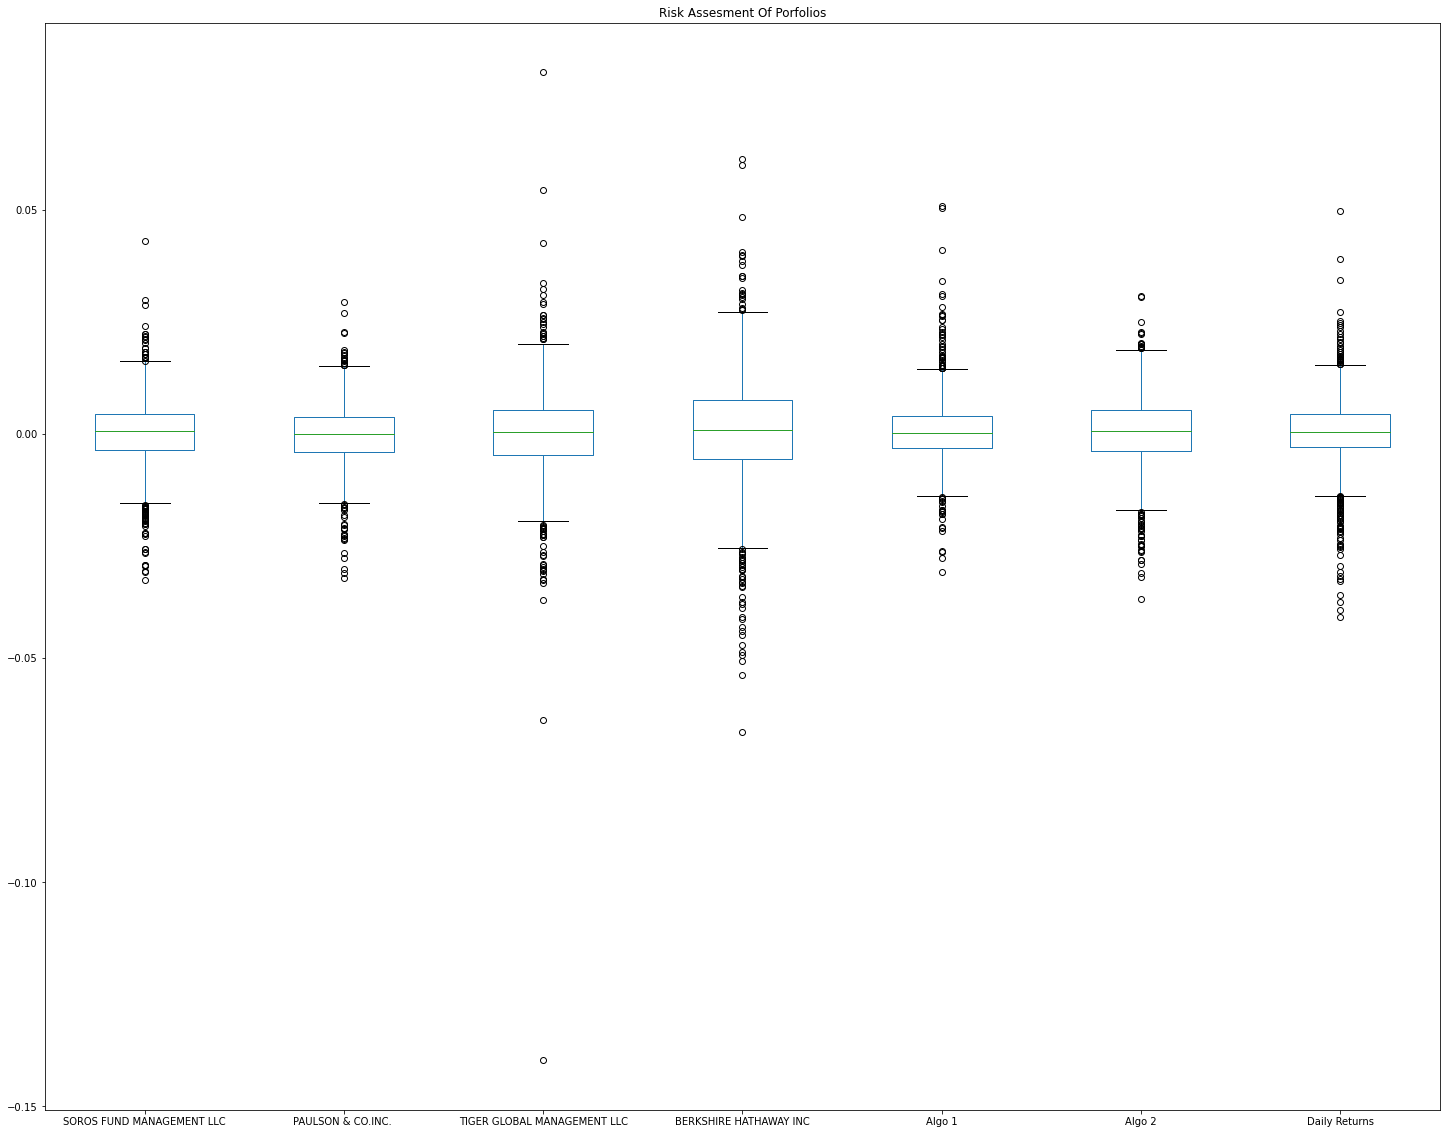

In [18]:
# Box plot to visually show risk
risk_portfolio = complete_port.plot(kind='box',title='Risk Assesment Of Porfolios', figsize=(25,20))

In [19]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
daily_std = complete_port.std()
daily_std.sort_values()

PAULSON & CO.INC.              0.007023
Algo 1                         0.007620
SOROS FUND MANAGEMENT LLC      0.007895
Algo 2                         0.008342
Daily Returns                  0.008554
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

In [42]:
# Determine which portfolios are riskier than the S&P 500
def risky_port():
    count = 0
    for col in daily_std:
        width =  50- len(daily_std.index[count])
        fir = "True"
        sec = "False"
        if  col > daily_std['Daily Returns']:
            print (f'{daily_std.index[count]} {fir.rjust(width)}')
        else: print (f'{daily_std.index[count]} {sec.rjust(width)}')
        count += 1
risky_port()

SOROS FUND MANAGEMENT LLC                     False
PAULSON & CO.INC.                             False
TIGER GLOBAL MANAGEMENT LLC                    True
BERKSHIRE HATHAWAY INC                         True
Algo 1                                        False
Algo 2                                        False
Daily Returns                                 False


In [21]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
Daily Returns                  0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

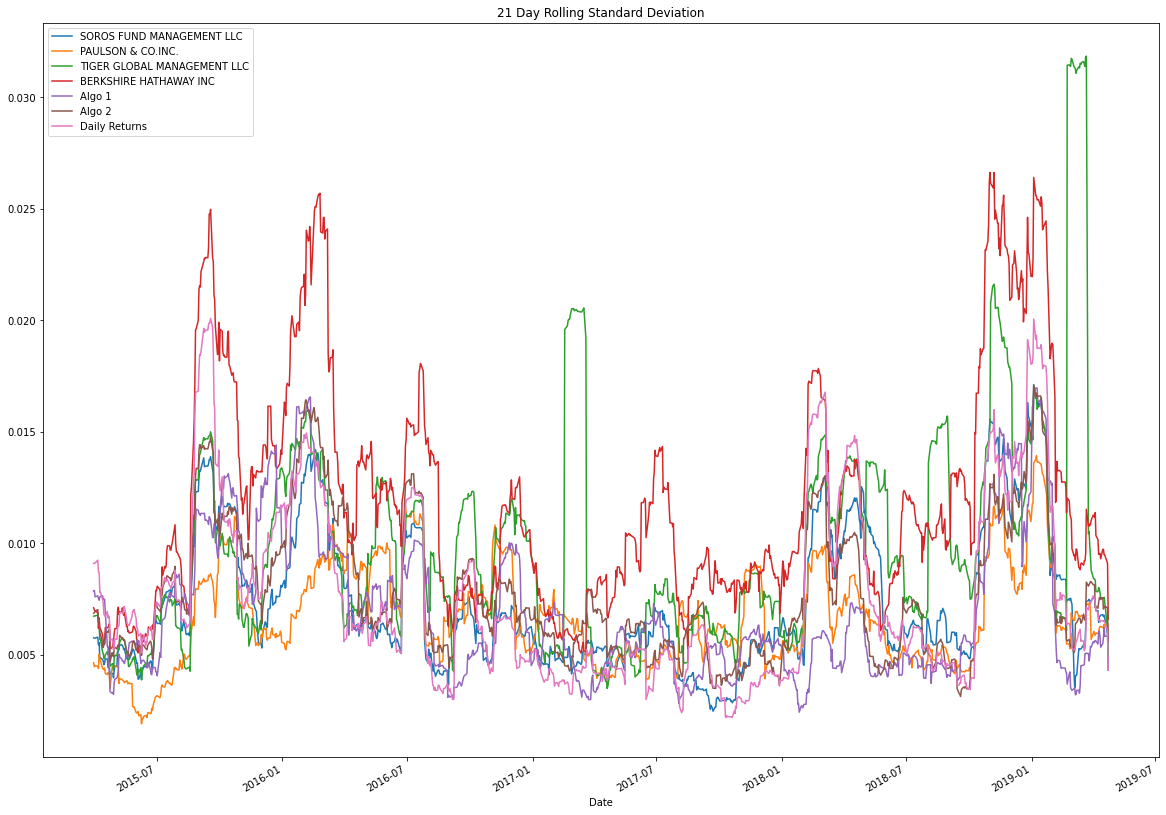

In [22]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
complete_rolling_std = complete_port.rolling(window=21).std().plot(title='21 Day Rolling Standard Deviation', figsize=(20,15))

In [23]:
# Construct a correlation table
complete_correlation = complete_port.corr()
complete_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Daily Returns
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
Daily Returns,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


<AxesSubplot:title={'center':'Soros Fund'}, xlabel='Date'>

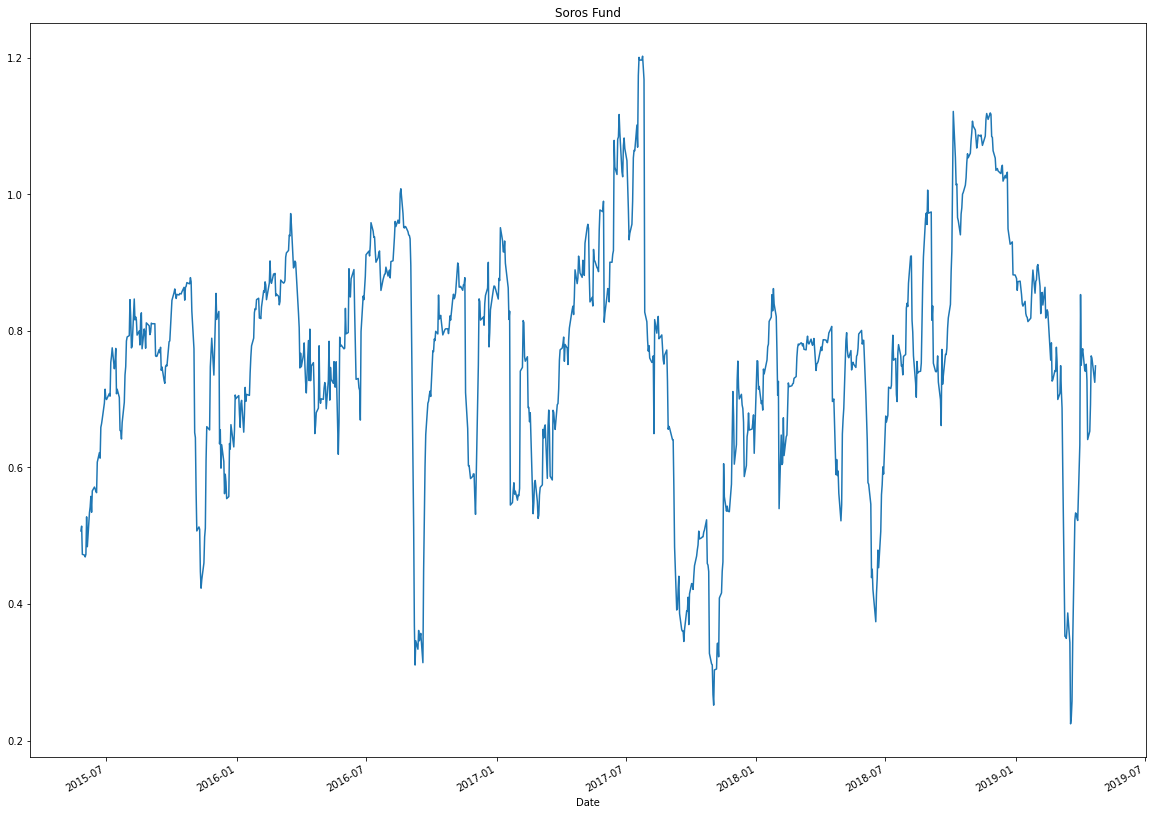

In [24]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
soros_cov = complete_port['SOROS FUND MANAGEMENT LLC'].rolling(window=50).cov(complete_port['Daily Returns'])
rolling_var = complete_port['Daily Returns'].rolling(window=60).var()
soros_rolling = soros_cov/rolling_var
soros_rolling.plot(title = 'Soros Fund',figsize=(20,15))

<AxesSubplot:title={'center':'Exponentially Weighted Moving Average'}, xlabel='Date'>

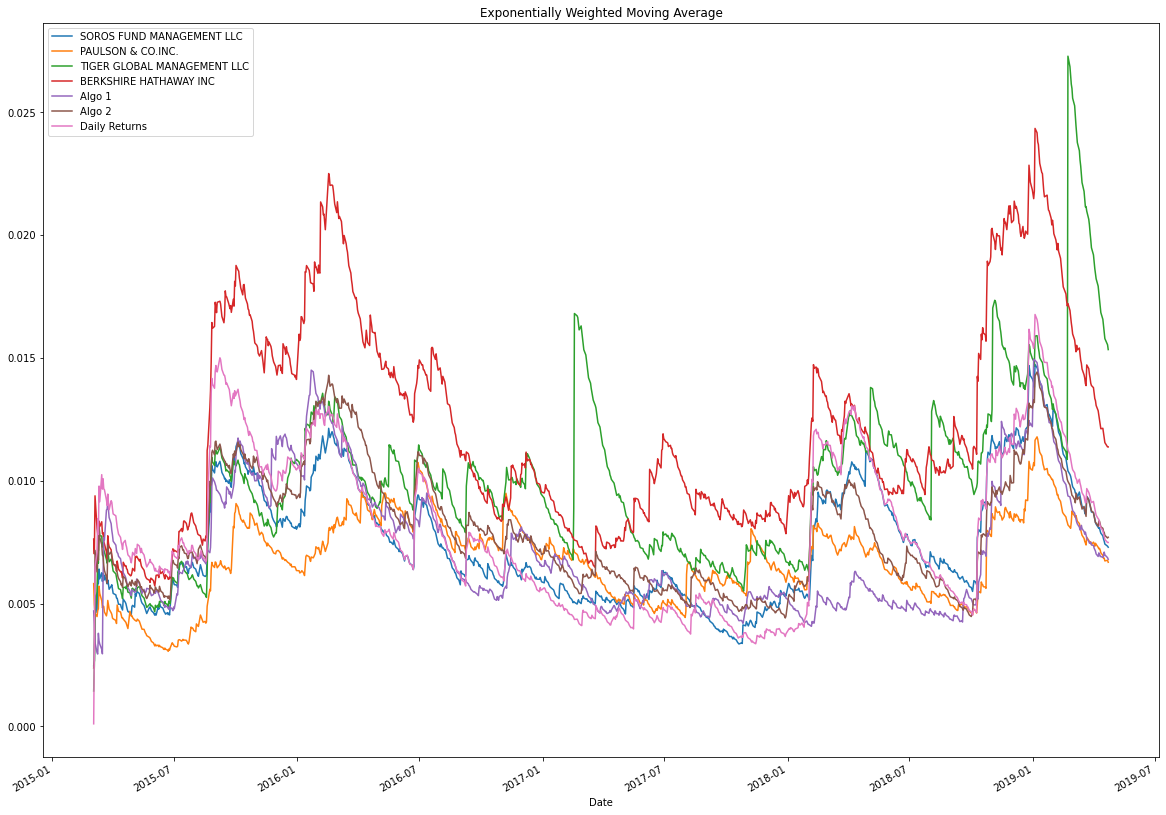

In [25]:
# Calculate a rolling window using the exponentially weighted moving average. 
rolling_window_exp = complete_port.ewm(halflife=21).std()
rolling_window_exp.plot(title='Exponentially Weighted Moving Average', figsize=(20,15))

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [26]:
# Calculate annualized Sharpe Ratios
sharpe_ratios = (complete_port.mean()*252)/ (complete_port.std()*np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
Daily Returns                  0.648267
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

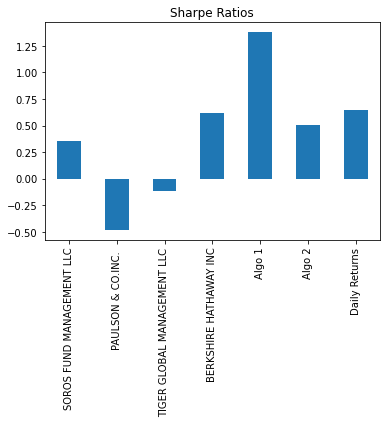

In [27]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar', title='Sharpe Ratios')

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [28]:
# Read the first stock.
spotify_csv = Path('Resources/spotify_returns.csv')
spotify_returns = pd.read_csv(spotify_csv,index_col='Date',parse_dates=True)
spotify_returns.insert(0,"Symbol", "SPOT")
spotify_returns.head()

,Symbol,Close
Date,,
2019-01-02,SPOT,113.74
2019-01-03,SPOT,109.02
2019-01-04,SPOT,118.51
2019-01-07,SPOT,119.36
2019-01-08,SPOT,117.48


In [29]:
# Read the second stock
disney_csv = Path('Resources/disney_returns.csv')
disney_returns = pd.read_csv(disney_csv,index_col='Date',parse_dates=True)
disney_returns.insert(0,"Symbol", "DIS")
disney_returns.head()

,Symbol,Close
Date,,
2019-01-02,DIS,108.97
2019-01-03,DIS,106.33
2019-01-04,DIS,109.61
2019-01-07,DIS,110.56
2019-01-08,DIS,111.42


In [30]:
# Read the third stock
boa_csv = Path('Resources/bankofamerica_returns.csv')
boa_returns = pd.read_csv(boa_csv,index_col='Date',parse_dates=True)
boa_returns.insert(0,"Symbol", "BAC")
boa_returns.head()

,Symbol,Close
Date,,
2019-01-02,BAC,24.96
2019-01-03,BAC,24.56
2019-01-04,BAC,25.58
2019-01-07,BAC,25.56
2019-01-08,BAC,25.51


In [31]:
salesforce_csv = Path('Resources/salesforce_returns.csv')
salesforce_returns = pd.read_csv(salesforce_csv,index_col='Date',parse_dates=True)
salesforce_returns.insert(0,"Symbol", "CRM")
salesforce_returns.head()

,Symbol,Close
Date,,
2019-01-02,CRM,135.55
2019-01-03,CRM,130.40
2019-01-04,CRM,137.96
2019-01-07,CRM,142.22
2019-01-08,CRM,145.72


In [32]:
square_csv = Path('Resources/square_returns.csv')
square_returns = pd.read_csv(square_csv,index_col='Date',parse_dates=True)
square_returns.insert(0,"Symbol", "SQ")
square_returns.head()

,Symbol,Close
Date,,
2019-01-02,SQ,57.20
2019-01-03,SQ,52.42
2019-01-04,SQ,58.18
2019-01-07,SQ,60.72
2019-01-08,SQ,63.12


In [33]:
# Concatenate all stocks into a single DataFrame
complete_df = pd.concat([square_returns,boa_returns,salesforce_returns,disney_returns,spotify_returns], axis='rows', join='inner')

In [34]:
# Reset the index
complete_df = complete_df.reset_index()

In [35]:
# Pivot so that each column of prices represents a unique symbol
complete_df = complete_df.pivot_table(values='Close', index='Date',columns='Symbol')

In [47]:
# Drop Nulls
complete_df = complete_df.dropna()

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [48]:
# Calculate weighted portfolio returns
def weight_return(): 
    weight_ct = len(complete_df.columns)
    weight = []
    ct = 0
    shifted_weight = 1/weight_ct
    while ct < weight_ct:
        weight.append(shifted_weight)
        ct+=1
    return weight

weight_percent = complete_df.pct_change()
weighted_returns = weight_percent.dot(weight_return())
weighted_returns

Date
2019-01-02         NaN
2019-01-03   -0.040662
2019-01-04    0.065457
2019-01-07    0.017919
2019-01-08    0.010841
                ...   
2020-09-24    0.001140
2020-09-25    0.019306
2020-09-28    0.015784
2020-09-29    0.007179
2020-09-30    0.001072
Length: 441, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [46]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
entire_port_return = pd.concat([complete_port, weighted_returns], axis='columns',join='inner')
entire_port_return.rename(columns={0:"Weighted"})

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Daily Returns,Weighted
Date,,,,,,,,
2019-01-02,0.006027,0.015429,0.007881,-0.001554,0.050342,0.018022,0.001269,NaN
2019-01-03,-0.007848,-0.007403,-0.008478,-0.032053,0.015246,-0.011792,-0.024757,-0.040662
2019-01-04,0.029881,0.027032,0.033560,0.061341,0.017622,0.030509,0.034336,0.065457
2019-01-07,0.009051,0.014475,0.014111,0.017185,0.014748,0.016942,0.007010,0.017919
2019-01-08,0.010760,0.008050,0.001544,0.005851,0.010825,0.010479,0.009695,0.010841
...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,-0.005901
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,-0.004824
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,-0.000806


In [50]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
entire_port_return = entire_port_return.dropna()
entire_port_return

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Daily Returns,0
Date,,,,,,,,
2019-01-03,-0.007848,-0.007403,-0.008478,-0.032053,0.015246,-0.011792,-0.024757,-0.040662
2019-01-04,0.029881,0.027032,0.033560,0.061341,0.017622,0.030509,0.034336,0.065457
2019-01-07,0.009051,0.014475,0.014111,0.017185,0.014748,0.016942,0.007010,0.017919
2019-01-08,0.010760,0.008050,0.001544,0.005851,0.010825,0.010479,0.009695,0.010841
2019-01-09,0.008630,-0.000800,-0.000534,0.019788,0.000214,0.009658,0.004098,0.022348
...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,-0.005901
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,-0.004824
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,-0.000806


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [54]:
# Risk

In [ ]:
# Rolling
# YOUR CODE HERE

In [ ]:
# Annualized Sharpe Ratios
# YOUR CODE HERE

In [ ]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE

In [ ]:
# Create a correlation analysis
# YOUR CODE HERE

In [ ]:
# Beta
# YOUR CODE HERE